### Import Libraries

In [1]:
import numpy as np
import pandas as pd
# import mplfinance as mpf
# import matplotlib.pyplot as plt 
# from arch import arch_model

#matplotlib


In [2]:
# Define the path to your CSV file
csv_path = './Data/NIFTY_1.csv'

# Read the CSV file
df = pd.read_csv(csv_path)

In [3]:
with open('./Data/NIFTY_1.csv', 'r') as file:
    for i in range(100):  # Print first 5 lines
        print(file.readline())

,ASSET,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOLUME

0,NIFTY,2017-01-02,09:15:00,8212.0,8212.0,8188.6,8189.55,0.0

1,NIFTY,2017-01-02,09:16:00,8188.75,8193.95,8188.75,8189.95,0.0

2,NIFTY,2017-01-02,09:17:00,8190.15,8190.75,8173.6,8173.7,0.0

3,NIFTY,2017-01-02,09:18:00,8173.0,8177.55,8168.8,8177.55,0.0

4,NIFTY,2017-01-02,09:19:00,8177.85,8178.15,8173.45,8174.4,0.0

5,NIFTY,2017-01-02,09:20:00,8174.6,8174.9,8167.05,8167.4,0.0

6,NIFTY,2017-01-02,09:21:00,8167.15,8172.0,8164.4,8171.8,0.0

7,NIFTY,2017-01-02,09:22:00,8171.95,8173.5,8165.7,8168.9,0.0

8,NIFTY,2017-01-02,09:23:00,8169.2,8173.9,8168.25,8168.95,0.0

9,NIFTY,2017-01-02,09:24:00,8169.6,8169.75,8165.3,8169.4,0.0

10,NIFTY,2017-01-02,09:25:00,8169.5,8171.5,8168.05,8170.25,0.0

11,NIFTY,2017-01-02,09:26:00,8170.15,8170.15,8164.1,8167.6,0.0

12,NIFTY,2017-01-02,09:27:00,8168.15,8168.4,8161.7,8162.0,0.0

13,NIFTY,2017-01-02,09:28:00,8161.85,8162.75,8157.9,8158.1,0.0

14,NIFTY,2017-01-02,09:29:00,8157.1,8157.6,8150.55,8150.9,0.0

15,NIFTY,

In [4]:
nifty = pd.read_csv('Data/NIFTY_SPOT.csv', parse_dates=['DATE'], index_col=0)

### Load Data

In [5]:
nifty = pd.read_csv('Data/NIFTY_SPOT.csv', index_col=0, parse_dates=['DATE', 'TIME'])
nifty.rename(columns={'DATE': 'Date', 'ASSET': 'Asset', 'TIME': 'Time', 'OPEN': 'Open', 'CLOSE': 'Close', 'HIGH': 'High', 'LOW': 'Low', 'VOLUME': 'Volume'}, inplace=True)

nifty['Date'] = pd.to_datetime(nifty['Date'] + ' ' + nifty['Time'])
nifty.set_index('Date', inplace=True)
# nifty.drop(['Date', 'Time'], axis=1, inplace=True)
nifty.head()

# nifty.index = pd.to_datetime(nifty['Date'])
# nifty.drop('Date', axis=1, inplace=True)
# nifty.head(3)


/tmp/ipykernel_1313/187781182.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  nifty = pd.read_csv('Data/NIFTY_SPOT.csv', index_col=0, parse_dates=['DATE', 'TIME'])


TypeError: unsupported operand type(s) for +: 'DatetimeArray' and 'str'

### Plot Data

/home/tamal/miniconda3/envs/vp/lib/python3.12/site-packages/mplfinance/plotting.py:707: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  volumeAxes.set_ylim(vymin,vymax)


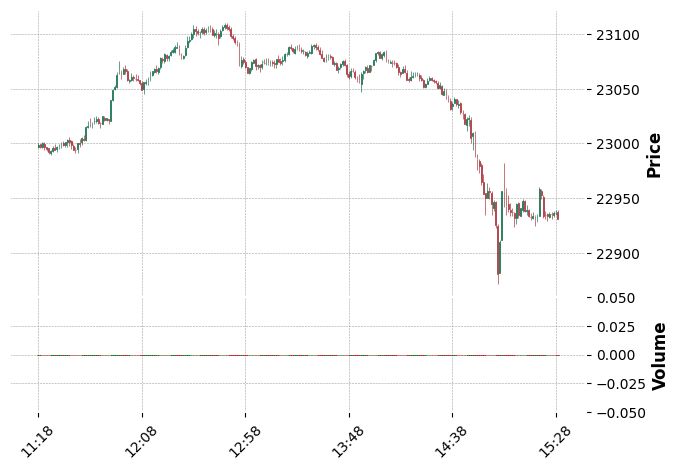

In [ ]:
mpf.plot(nifty[-252:], type='candle', style='charles', volume=True)

In [ ]:
nifty.shape

(683877, 7)

### Make Candles

In [ ]:
def make_candle(df, timeframe):
    # Resample the data into 15-minute intervals and calculate OHLCV
    df_ = df.resample(timeframe, origin='start').agg({
        'Open': 'first',
        'High': 'max',
        'Low': 'min',
        'Close': 'last',
        'Volume': 'sum'
    })

    df_.dropna(inplace=True)  # Drop any NaN values that might have been introduced
    return df_
    

timeframe = '24h'
data= make_candle(nifty, timeframe)
data.head(20)
    

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-02 09:15:00,8212.00,8212.00,8133.80,8179.20,0.0
2017-01-03 09:15:00,8192.55,8219.10,8148.60,8189.05,0.0
2017-01-04 09:15:00,8200.60,8218.50,8180.90,8196.35,0.0
2017-01-05 09:15:00,8229.00,8282.65,8223.70,8270.50,0.0
2017-01-06 09:15:00,8283.50,8306.85,8233.25,8248.20,0.0
2017-01-09 09:15:00,8259.40,8263.00,8227.75,8234.55,0.0
2017-01-10 09:15:00,8264.35,8293.80,8261.00,8290.30,0.0
2017-01-11 09:15:00,8330.80,8389.00,8322.25,8374.30,0.0
2017-01-12 09:15:00,8397.45,8417.20,8382.30,8409.15,0.0


### Callculate Returns

In [ ]:
data['returns'] = data['Close'].pct_change()
data.head(20)

,Open,High,Low,Close,Volume,daily_returns
Date,,,,,,
2017-01-02 09:15:00,8212.00,8212.00,8133.80,8179.20,0.0,NaN
2017-01-03 09:15:00,8192.55,8219.10,8148.60,8189.05,0.0,0.001204
2017-01-04 09:15:00,8200.60,8218.50,8180.90,8196.35,0.0,0.000891
2017-01-05 09:15:00,8229.00,8282.65,8223.70,8270.50,0.0,0.009047
2017-01-06 09:15:00,8283.50,8306.85,8233.25,8248.20,0.0,-0.002696
2017-01-09 09:15:00,8259.40,8263.00,8227.75,8234.55,0.0,-0.001655
2017-01-10 09:15:00,8264.35,8293.80,8261.00,8290.30,0.0,0.006770
2017-01-11 09:15:00,8330.80,8389.00,8322.25,8374.30,0.0,0.010132
2017-01-12 09:15:00,8397.45,8417.20,8382.30,8409.15,0.0,0.004162


In [ ]:
window = 30  # 30-day historical volatility
data['hist_volatility_30d'] = data['returns'].rolling(window=window).std() * np.sqrt(252)  # Annualizing
data.tail(20)

,Open,High,Low,Close,Volume,daily_returns,hist_volatility_30d
Date,,,,,,,
2024-04-29 09:15:00,22488.40,22655.80,22441.90,22633.15,0.0,0.008149,0.105512
2024-04-30 09:15:00,22684.20,22783.35,22568.40,22587.75,0.0,-0.002006,0.094059
2024-05-02 09:15:00,22582.50,22710.50,22580.60,22656.75,0.0,0.003055,0.092012
2024-05-03 09:15:00,22766.35,22794.70,22348.05,22455.65,0.0,-0.008876,0.093483
2024-05-06 09:15:00,22561.60,22588.80,22409.45,22462.60,0.0,0.000309,0.093332
2024-05-07 09:15:00,22489.75,22499.05,22232.05,22304.50,0.0,-0.007038,0.089910
2024-05-08 09:15:00,22231.20,22368.65,22185.20,22307.80,0.0,0.000148,0.089859
2024-05-09 09:15:00,22245.85,22307.75,21932.40,21968.15,0.0,-0.015226,0.098756
2024-05-10 09:15:00,21979.45,22131.30,21950.30,22054.00,0.0,0.003908,0.099021


Realized Volatility

In [ ]:
data['log_returns'] = np.log(data["Close"]/data["Close"].shift(1))
data['realized_volatility'] = data.log_returns.rolling(window=30).std(ddof=0)*np.sqrt(252)
data.tail()

,Open,High,Low,Close,Volume,daily_returns,hist_volatility_30d,log_returns,realized_volatility
Date,,,,,,,,,
2024-05-21 09:15:00,22404.55,22591.1,22404.55,22509.90,0.0,0.000351,0.096470,0.000351,0.095032
2024-05-22 09:15:00,22570.65,22629.5,22483.15,22620.50,0.0,0.004913,0.097490,0.004901,0.096037
2024-05-23 09:15:00,22602.95,22993.6,22577.45,22951.55,0.0,0.014635,0.104863,0.014529,0.103171
2024-05-24 09:15:00,22928.60,23026.4,22908.00,22952.00,0.0,0.000020,0.104816,0.000020,0.103127
2024-05-27 09:15:00,23034.65,23110.8,22871.20,22931.05,0.0,-0.000913,0.104388,-0.000913,0.102700


Return

In [ ]:
# data['returns'] = data['Close'].pct_change()
# data.head()

,Open,High,Low,Close,Volume,daily_returns,hist_volatility_30d,log_returns,realized_volatility,returns
Date,,,,,,,,,,
2017-01-02 09:15:00,8212.00,8212.00,8133.80,8179.20,0.0,NaN,NaN,NaN,NaN,NaN
2017-01-03 09:15:00,8192.55,8219.10,8148.60,8189.05,0.0,0.001204,NaN,0.001204,NaN,0.001204
2017-01-04 09:15:00,8200.60,8218.50,8180.90,8196.35,0.0,0.000891,NaN,0.000891,NaN,0.000891
2017-01-05 09:15:00,8229.00,8282.65,8223.70,8270.50,0.0,0.009047,NaN,0.009006,NaN,0.009047
2017-01-06 09:15:00,8283.50,8306.85,8233.25,8248.20,0.0,-0.002696,NaN,-0.002700,NaN,-0.002696


<Axes: xlabel='Date'>

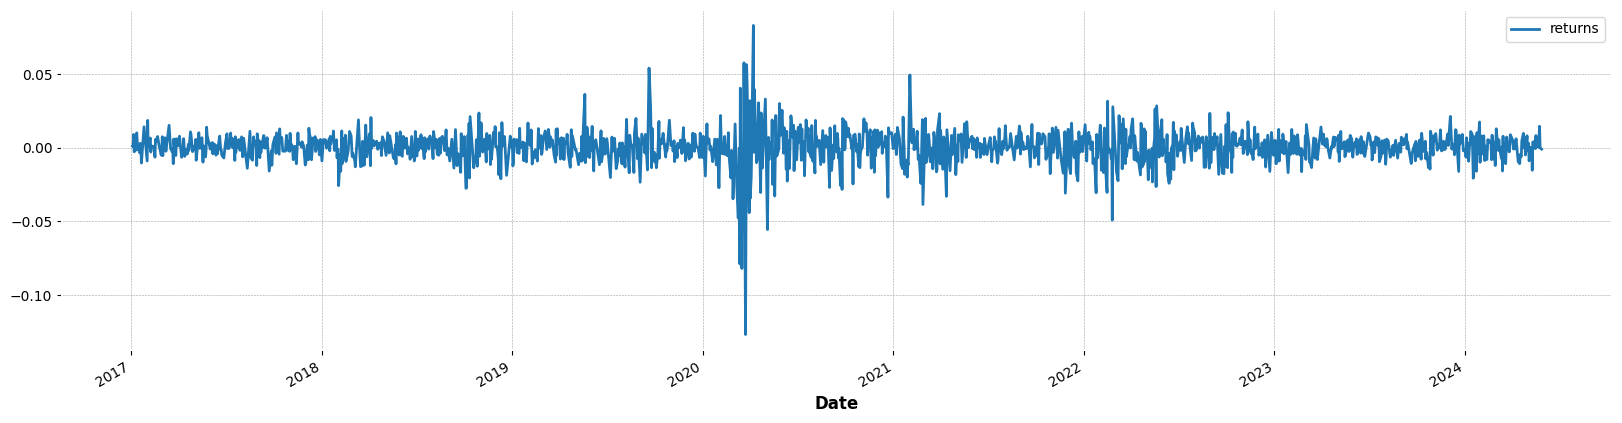

<Axes: xlabel='Date'>

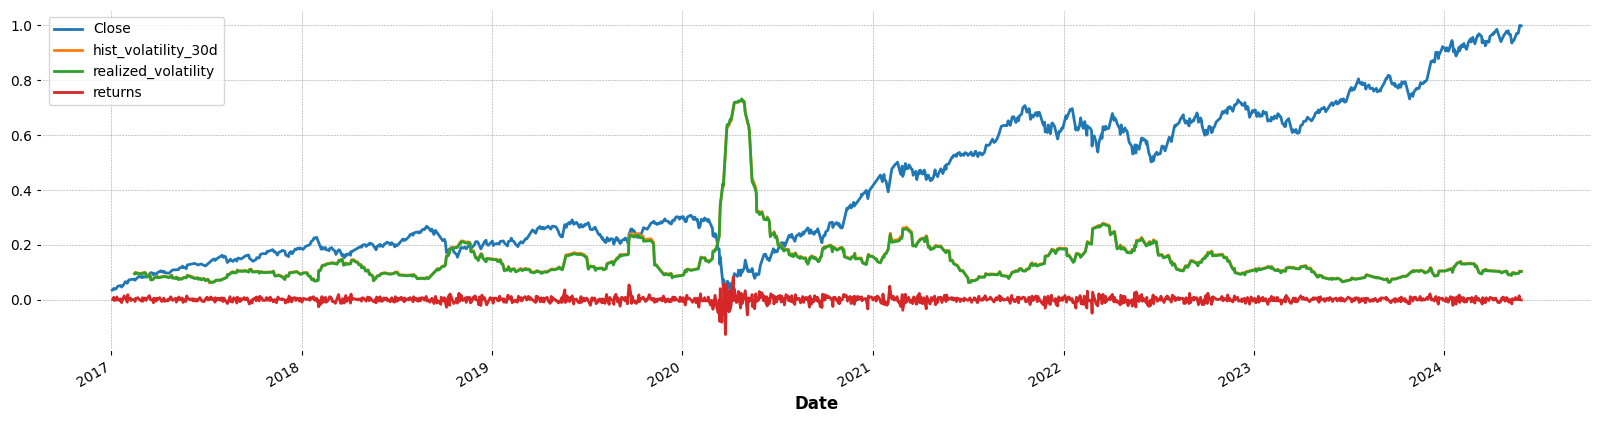

In [ ]:
scaled_prices = (data['Close'] -data['Close'].min()) / (data['Close'].max()-data['Close'].min())

# scaled_prices = data['Close'] / data['Close'].max()
scaled_prices.dropna().plot(figsize=(10, 5), legend=True)
data['hist_volatility_30d'].dropna().plot(figsize=(20, 5), legend=True)
data['realized_volatility'].dropna().plot(figsize=(20, 5), legend=True)
data['returns'].plot(figsize=(20, 5), legend=True)

In [28]:
data['hist_volatility_30d'][-10:]

Date
2024-05-14 09:15:00    0.098546
2024-05-15 09:15:00    0.095030
2024-05-16 09:15:00    0.096731
2024-05-17 09:15:00    0.097193
2024-05-18 09:15:00    0.097267
2024-05-21 09:15:00    0.096470
2024-05-22 09:15:00    0.097490
2024-05-23 09:15:00    0.104863
2024-05-24 09:15:00    0.104816
2024-05-27 09:15:00    0.104388
Name: hist_volatility_30d, dtype: float64

In [34]:
data[data['returns']>0]

,Open,High,Low,Close,Volume,daily_returns,hist_volatility_30d,log_returns,realized_volatility,returns
Date,,,,,,,,,,
2017-01-03 09:15:00,8192.55,8219.10,8148.60,8189.05,0.0,0.001204,NaN,0.001204,NaN,0.001204
2017-01-04 09:15:00,8200.60,8218.50,8180.90,8196.35,0.0,0.000891,NaN,0.000891,NaN,0.000891
2017-01-05 09:15:00,8229.00,8282.65,8223.70,8270.50,0.0,0.009047,NaN,0.009006,NaN,0.009047
2017-01-10 09:15:00,8264.35,8293.80,8261.00,8290.30,0.0,0.006770,NaN,0.006747,NaN,0.006770
2017-01-11 09:15:00,8330.80,8389.00,8322.25,8374.30,0.0,0.010132,NaN,0.010081,NaN,0.010132
...,...,...,...,...,...,...,...,...,...,...
2024-05-18 09:15:00,22519.75,22520.25,22037.40,22502.00,0.0,0.001622,0.097267,0.001621,0.095816,0.001622
2024-05-21 09:15:00,22404.55,22591.10,22404.55,22509.90,0.0,0.000351,0.096470,0.000351,0.095032,0.000351
2024-05-22 09:15:00,22570.65,22629.50,22483.15,22620.50,0.0,0.004913,0.097490,0.004901,0.096037,0.004913


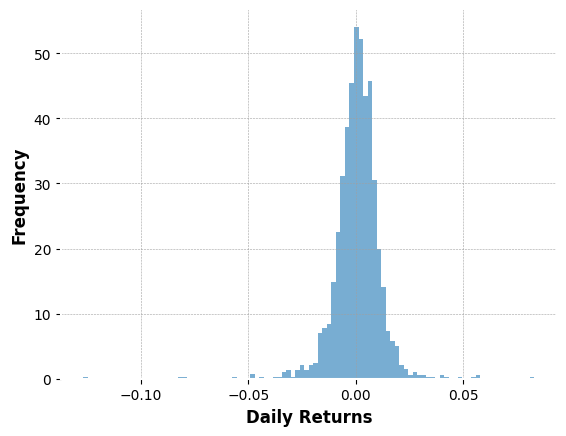

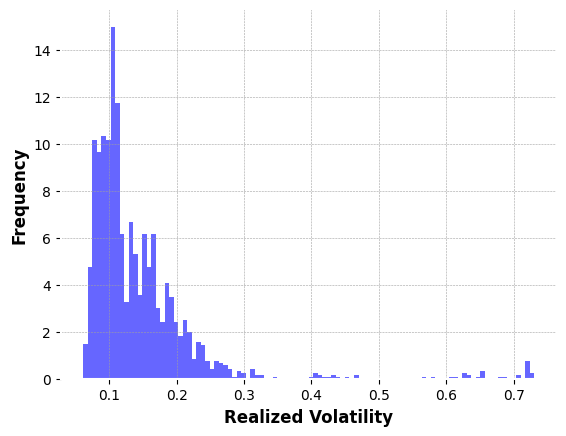

In [41]:
plt.hist(data['returns'], bins=100, density=True,alpha=0.6, label='Daily Returns', )
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.show()

plt.hist(data['hist_volatility_30d'], bins=100, density=True, alpha=0.6, color='b', label='Realized Volatility')
plt.xlabel('Realized Volatility')
plt.ylabel('Frequency')
plt.show()

## Relation Between high volatility and return

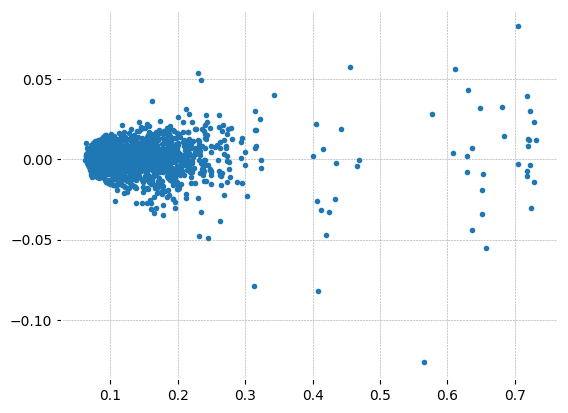

In [62]:
plt.plot(data['hist_volatility_30d'], data['returns'], '.')

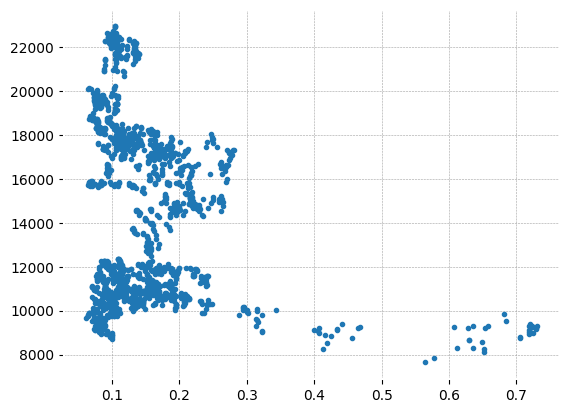

In [61]:
plt.plot(data['hist_volatility_30d'], data['Close'], '.')

In [44]:
data[['returns', 'hist_volatility_30d']].corr()

,returns,hist_volatility_30d
returns,1.000000,0.018088
hist_volatility_30d,0.018088,1.000000


Filter High Volatility Region

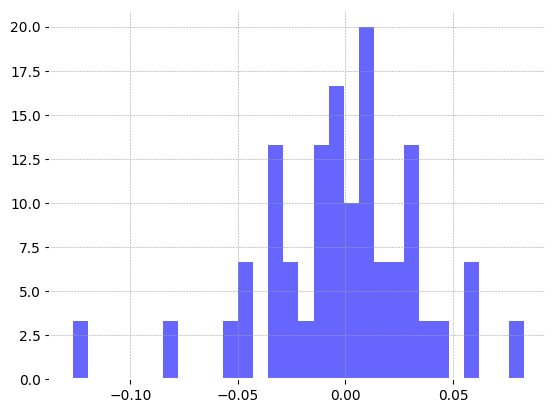

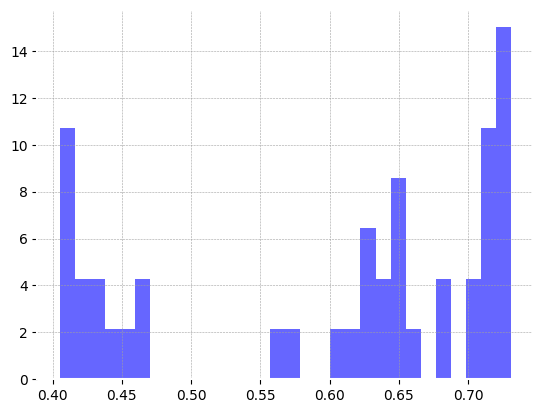

In [52]:
plt.hist(data[data['hist_volatility_30d'] >= 0.4]['returns'], bins=30, density=True, alpha=0.6, color='b', label='Returns')
plt.show()
plt.hist(data[data['hist_volatility_30d'] >= 0.4]['hist_volatility_30d'], bins=30, density=True, alpha=0.6, color='b', label='HIstorical Volatility')
plt.show()


### ARCH Model

Iteration:      1,   Func. Count:      5,   Neg. LLF: 996977525.7663982
Iteration:      2,   Func. Count:     12,   Neg. LLF: 2330.2668353032086
Iteration:      3,   Func. Count:     17,   Neg. LLF: 2320.594315129664
Iteration:      4,   Func. Count:     22,   Neg. LLF: 2351.551022304685
Iteration:      5,   Func. Count:     27,   Neg. LLF: 2333.571550752532
Iteration:      6,   Func. Count:     32,   Neg. LLF: 2314.476187324347
Iteration:      7,   Func. Count:     36,   Neg. LLF: 2314.4650135788434
Iteration:      8,   Func. Count:     40,   Neg. LLF: 2314.4650060803065
Iteration:      9,   Func. Count:     43,   Neg. LLF: 2314.4650060791296
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2314.4650060803065
            Iterations: 9
            Function evaluations: 43
            Gradient evaluations: 9
                       Zero Mean - GARCH Model Results                        
Dep. Variable:                returns   R-squared:           

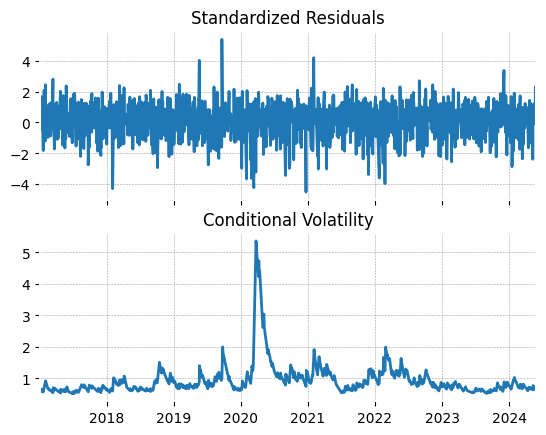

In [69]:
# Creating GARCH model object and fitting the model to financial data
returns = 100 * data['returns'].dropna()
model = arch_model(returns, mean='Zero', vol='GARCH', p=1, q=1)
res = model.fit()

# Displaying model summary
print(res.summary())
print(res)


res.plot()
plt.show()